# Philadelphia Open Policing Project (OPP)

In [187]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

plt.rcParams['figure.figsize'] = (20, 6)
plt.style.use('ggplot')


In [4]:
zip_path = "philadelphia_data.zip" # path for zip file

with zipfile.ZipFile(zip_path) as z: # CSV in zip file
    print(z.namelist())

    with z.open(z.namelist()[0]) as f: # read CSV file
        df = pd.read_csv(f)

df.head()

['pa_philadelphia_2020_04_01.csv']


C:\Users\acast\AppData\Local\Temp\ipykernel_2016\524992427.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)


,raw_row_number,date,time,location,lat,lng,district,service_area,subject_age,subject_race,subject_sex,type,arrest_made,outcome,contraband_found,frisk_performed,search_conducted,search_person,search_vehicle,raw_race,raw_individual_contraband,raw_vehicle_contraband
0,411981,2014-01-01,01:14:00,NaN,NaN,NaN,19.0,191,31.0,black,male,pedestrian,True,arrest,True,False,True,True,False,Black - Non-Latino,True,False
1,407442,2014-01-01,01:57:00,NaN,NaN,NaN,12.0,121,21.0,black,male,pedestrian,True,arrest,False,True,True,True,False,Black - Non-Latino,False,False
2,217556,2014-01-01,03:30:00,3400 BLOCK SPRUCE ST,39.950424,-75.192680,18.0,183,24.0,black,male,pedestrian,False,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False
3,217557,2014-01-01,03:40:00,3400 BLOCK SPRUCE ST,39.950424,-75.192680,18.0,183,20.0,black,male,pedestrian,False,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False
4,230988,2014-01-01,08:30:00,N 56TH ST / UPLAND WAY,39.983712,-75.234188,19.0,193,31.0,black,male,vehicular,False,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False


| Column name               | Column meaning                                                                                                                                                                                                                                                                                                                                                                                                   | Example value    |
|:--------------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-----------------|
| raw_row_number            | An number used to join clean data back to the raw data                                                                                                                                                                                                                                                                                                                                                           | 38299            |
| date                      | The date of the stop, in YYYY-MM-DD format. Some states do not provide the exact stop date: for example, they only provide the year or quarter in which the stop occurred. For these states, stop_date is set to the date at the beginning of the period: for example, January 1 if only year is provided.                                                                                                       | 2017-02-02       |
| time                      | The 24-hour time of the stop, in HH:MM format.                                                                                                                                                                                                                                                                                                                                                                   | 20:15            |
| location                  | The freeform text of the location. Occasionally, this represents the concatenation of several raw fields, i.e. street_number, street_name                                                                                                                                                                                                                                                                        | 248 Stockton Rd. |
| lat                       | The latitude of the stop. If not provided by the department, we attempt to geocode any provided address or location using Google Maps. Google Maps returns a "best effort" response, which may not be completely accurate if the provided location was malformed or underspecified. To protect against suprious responses, geocodes more than 4 standard deviations from the median stop lat/lng are set to NA.  | 72.23545         |
| lng                       | The longitude of the stop. If not provided by the department, we attempt to geocode any provided address or location using Google Maps. Google Maps returns a "best effort" response, which may not be completely accurate if the provided location was malformed or underspecified. To protect against suprious responses, geocodes more than 4 standard deviations from the median stop lat/lng are set to NA. | 115.2808         |
| district                  | Police district. If not provided, but we have retrieved police department shapefiles and the location of the stop, we geocode the stop and find the district using the shapefiles.                                                                                                                                                                                                                               | 8                |
| service_area              | Police service area. If not provided, but we have retrieved police department shapefiles and the location of the stop, we geocode the stop and find the service area using the shapefiles.                                                                                                                                                                                                                       | 8                |
| subject_age               | The age of the stopped subject. When date of birth is given, we calculate the age based on the stop date. Values outside the range of 10-110 are coerced to NA.                                                                                                                                                                                                                                                  | 54.23            |
| subject_race              | The race of the stopped subject. Values are standardized to white, black, hispanic, asian/pacific islander, and other/unknown                                                                                                                                                                                                                                                                                    | hispanic         |
| subject_sex               | The recorded sex of the stopped subject.                                                                                                                                                                                                                                                                                                                                                                         | female           |
| type                      | Type of stop: vehicular or pedestrian.                                                                                                                                                                                                                                                                                                                                                                           | vehicular        |
| arrest_made               | Indicates whether an arrest made.                                                                                                                                                                                                                                                                                                                                                                                | FALSE            |
| outcome                   | The strictest action taken among arrest, citation, warning, and summons.                                                                                                                                                                                                                                                                                                                                         | citation         |
| contraband_found          | Indicates whether contraband was found. When search_conducted is NA, this is coerced to NA under the assumption that contraband_found shouldn't be discovered when no search occurred and likely represents a data error.                                                                                                                                                                                        | FALSE            |
| frisk_performed           | Indicates whether a frisk was performed. This is technically different from a search, but departments will sometimes include frisks as a search type.                                                                                                                                                                                                                                                            | TRUE             |
| search_conducted          | Indicates whether any type of search was conducted, i.e. driver, passenger, vehicle. Frisks are excluded where the department has provided resolution on both.                                                                                                                                                                                                                                                   | TRUE             |
| search_person             | Indicates whether a search of a person has occurred. This is only defined when search_conducted is TRUE.                                                                                                                                                                                                                                                                                                         | TRUE             |
| search_vehicle            | Indicates whether a search of a vehicle has occurred. This is only defined when search_conducted is TRUE.                                                                                                                                                                                                                                                                                                        | TRUE             |
| raw_race                  | Raw racial data as received before standardization.                                                                                                                                                                                                                                                                                                                                                              | h                |
| raw_individual_contraband | Raw field related to contraband on the individual.                                                                                                                                                                                                                                                                                                                                                               | drug             |
| raw_vehicle_contraband    | Raw field related to contraband in the vehicle.    

In [6]:
df.shape

(1865096, 22)

In [7]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1865096 entries, 0 to 1865095
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   raw_row_number             1865096 non-null  object 
 1   date                       1865096 non-null  object 
 2   time                       1865096 non-null  object 
 3   location                   1827596 non-null  object 
 4   lat                        1760399 non-null  float64
 5   lng                        1760399 non-null  float64
 6   district                   1865095 non-null  float64
 7   service_area               1865092 non-null  object 
 8   subject_age                1860537 non-null  float64
 9   subject_race               1865096 non-null  object 
 10  subject_sex                1864446 non-null  object 
 11  type                       1865096 non-null  object 
 12  arrest_made                1865096 non-null  bool   
 13  outcome     

In [33]:
df.describe()

,lat,lng,district,subject_age
count,1760399.00,1760399.00,1865095.00,1860537.00
mean,39.99,-75.16,18.97,34.83
std,0.04,0.05,10.55,13.34
min,39.88,-75.28,1.00,10.00
25%,39.96,-75.20,12.00,24.00
50%,39.99,-75.16,18.00,31.00
75%,40.02,-75.13,25.00,44.00
max,40.14,-74.96,77.00,110.00


In [21]:
df.describe(include = "O")

,raw_row_number,date,time,location,service_area,subject_race,subject_sex,type,outcome,contraband_found,raw_race
count,1865096,1865096,1865096,1827596,1865092,1865096,1864446,1865096,95476,116455,1865096
unique,1865096,1565,1440,59246,270,6,2,2,1,2,7
top,411981,2015-10-27,20:00:00,3200 BLOCK KENSINGTON AV,242,black,male,vehicular,arrest,False,Black - Non-Latino
freq,1,2139,17957,3610,86375,1244249,1397206,1167683,95476,83225,1244249


## Columns Analysis

### 1. raw_row_number

The column shows a numeric ID but in some rows there are more than one number

In [37]:
df["raw_row_number"] = df["raw_row_number"].str.replace("|", "-")

In [39]:
df[df["raw_row_number"].str.contains("-")]["raw_row_number"]

86                231739-231740
133               358835-358836
243               249320-249321
437               156597-156598
447        250868-250870-400834
                   ...         
1864369         1788091-1791591
1864375         1788931-1789797
1864807         1790300-1790309
1864966         1794964-1794969
1865012         1790578-1790847
Name: raw_row_number, Length: 24796, dtype: object

Because this is an number used to join clean data back to the raw data, this column is related to the database structure but not the recorded information. Therefore, this column would be deleted

In [48]:
df.drop(columns = ["raw_row_number"], inplace = True)
df.head()

,date,time,location,lat,lng,district,service_area,subject_age,subject_race,subject_sex,type,arrest_made,outcome,contraband_found,frisk_performed,search_conducted,search_person,search_vehicle,raw_race,raw_individual_contraband,raw_vehicle_contraband
0,2014-01-01,01:14:00,NaN,NaN,NaN,19.00,191,31.00,black,male,pedestrian,True,arrest,True,False,True,True,False,Black - Non-Latino,True,False
1,2014-01-01,01:57:00,NaN,NaN,NaN,12.00,121,21.00,black,male,pedestrian,True,arrest,False,True,True,True,False,Black - Non-Latino,False,False
2,2014-01-01,03:30:00,3400 BLOCK SPRUCE ST,39.95,-75.19,18.00,183,24.00,black,male,pedestrian,False,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False
3,2014-01-01,03:40:00,3400 BLOCK SPRUCE ST,39.95,-75.19,18.00,183,20.00,black,male,pedestrian,False,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False
4,2014-01-01,08:30:00,N 56TH ST / UPLAND WAY,39.98,-75.23,19.00,193,31.00,black,male,vehicular,False,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False


### 2. date

In [91]:
df["date"]

0         2014-01-01
1         2014-01-01
2         2014-01-01
3         2014-01-01
4         2014-01-01
             ...    
1865091   2018-04-14
1865092   2018-04-14
1865093   2018-04-14
1865094   2018-04-14
1865095   2018-04-14
Name: date, Length: 1865096, dtype: datetime64[ns]

In [57]:
df["date"] = pd.to_datetime(df["date"])
df["date"]

0         2014-01-01
1         2014-01-01
2         2014-01-01
3         2014-01-01
4         2014-01-01
             ...    
1865091   2018-04-14
1865092   2018-04-14
1865093   2018-04-14
1865094   2018-04-14
1865095   2018-04-14
Name: date, Length: 1865096, dtype: datetime64[ns]

In [93]:
df.groupby("date").size()

date
2014-01-01      51
2014-01-02     115
2014-01-03      26
2014-01-04      32
2014-01-05      56
              ... 
2018-04-10    1169
2018-04-11    1325
2018-04-12    1118
2018-04-13    1181
2018-04-14     929
Length: 1565, dtype: int64

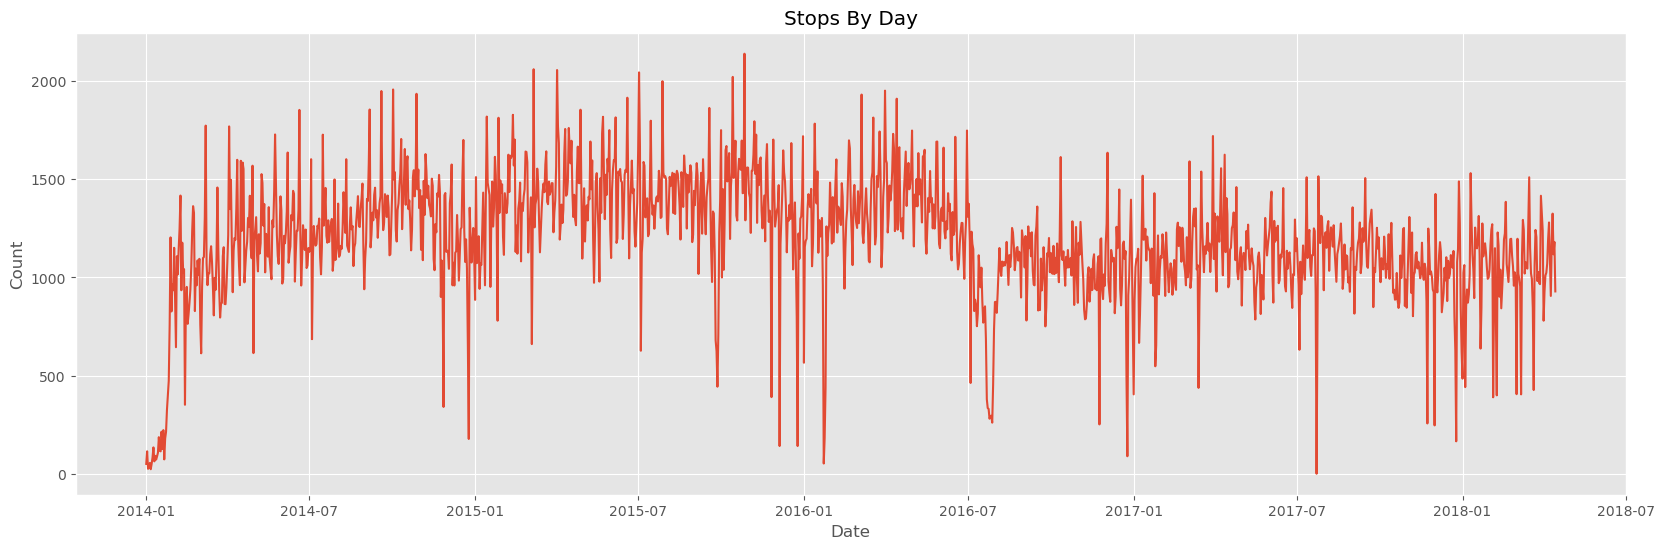

In [195]:
date_data = df.groupby("date").size()
sns.lineplot(data = date_data)
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Stops By Day")
plt.show()

In [191]:
df["Year"] = df["date"].dt.year
df["Month"] = df["date"].dt.month_name()
df["Day"] = df["date"].dt.day
df["Day_Week"] = df["date"].dt.day_name()
df[["Year", "Month", "Day", "Day_Week"]].head()

,Year,Month,Day,Day_Week
0,2014,January,1,Wednesday
1,2014,January,1,Wednesday
2,2014,January,1,Wednesday
3,2014,January,1,Wednesday
4,2014,January,1,Wednesday


#### 2.1 Year

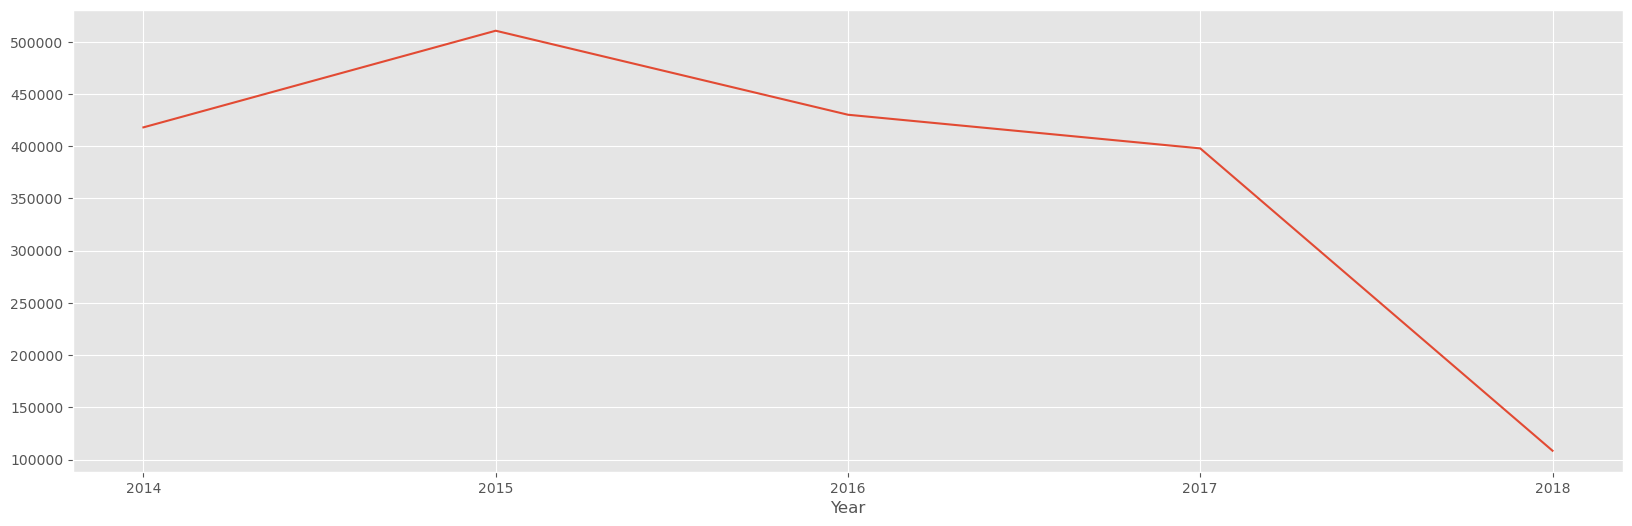

In [233]:
year_data = df.groupby(df["Year"]).size()
year_data
sns.lineplot(data = year_data)
plt.xticks(year_data.index)
plt.show()

### 2.2 Month

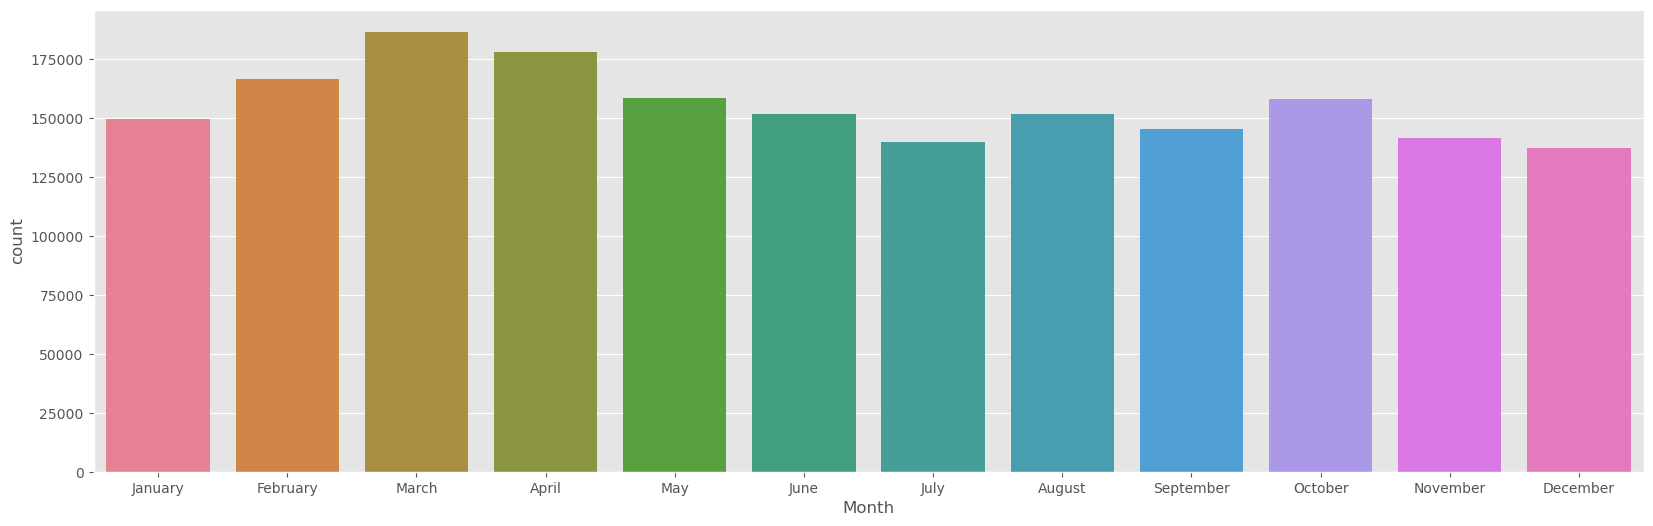

In [236]:
plt.figure(figsize=(20,6))
sns.countplot(data = df, x = "Month", hue = "Month")
plt.show()

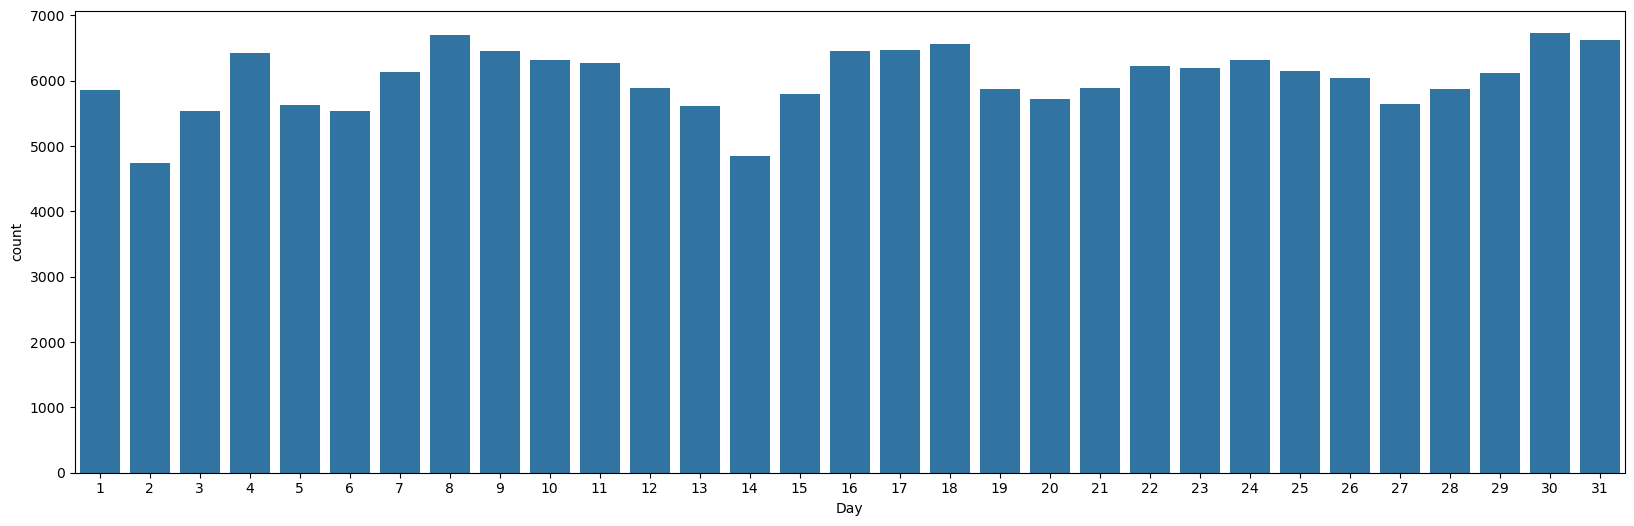

In [181]:
sns.countplot(data = df[df["Month"] == "March"], x = "Day")
plt.show()

### raw_row_number
Borrar columna

### date
- convertir datos a formato de fecha
- estudiar rango y patrones de tiempo (año, mes, semana, día)

### time
- convertir datos a formato de fehca
- estudiar rango y patrones de tiempo (hora)
- mapa de calor meses vs hora

### location
- Análisis nombre localizaicones (GPT)
- Agrupar por localizaciones
- Crear lineas con colores de acuerdo con la cantidad de multas

### lat lng
- posicionar la información sobre un mapa

### District
- Diagrama de barras

### Service Area
- Diagrama de Barras